In [163]:
import numpy as np
import matplotlib.pyplot as plt
#from impedance.preprocessing import readGamry



# Z_exp = open("Exp-data.DTA")
# print(Z_exp.read())

# f,Z_exp2= readGamry("1PVDF_K_0_0131_top16mm_A.DTA")
# print(Z_exp2)
# print(f)


filename = "1PVDF_K_0_0131_top16mm_A.DTA"

with open(filename, 'r', encoding='ISO-8859-1') as input_file:
        lines = input_file.readlines()
        
for count,line in enumerate(lines):
    if "ZCURVE" in line:
         start_line = count+3
raw_data = lines[start_line:]

freq_exp, ReZ_exp, ImZ_exp =[], [], []

for line in raw_data:
        # line = line.replace(",", ".")
        each_line = line.split()
        freq_exp.append(float(each_line[2]))
        ReZ_exp.append(float(each_line[3]))
        ImZ_exp.append(float(each_line[4]))

freq_exp =np.array(freq_exp)  
ReZ_exp =np.array(ReZ_exp) 
ImZ_exp =np.array(ImZ_exp)    
#print(freq_exp)  
#print(ReZ_exp) 

In [165]:
# RQ initialization

R_f = 10
Q_f = 3e-5
alp = 0.8

# freq =np.logspace(5,1,10);
# omega = 2*np.pi*freq
# Impedance_rq = R_f + 1/(((1j*omega)**alp)*Q_f)
# print(Impedance_rq)

0.002 3.1e-05 0.8706


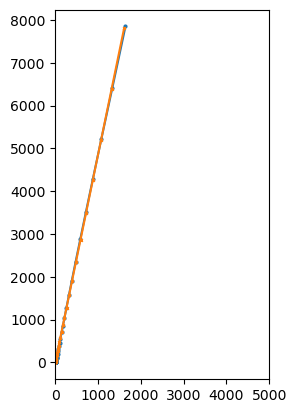

In [190]:
from scipy.optimize import minimize, NonlinearConstraint

def objective(x):
    
    
    omega = 2*np.pi*freq_exp
    R_f = x[0]
    Q_f = x[1]
    alp = x[2]

    Impedance_rq = R_f + 1/(((1j*omega)**alp)*Q_f)
    # print(Impedance_rq)
    terms = (np.real(Impedance_rq) - ReZ_exp)**2 +(np.imag(Impedance_rq) - ImZ_exp)**2
    Chi_square = sum(terms)
    return Chi_square

# def constraint(x):
#     return x[0]**2 + x[1]**2 - 1

# initial guess
x0 = [1, 1, 1]

# define the bounds for the variables
bounds = ((0, 1000), (0, 10),(0, 1))

# define the nonlinear constraint
# nonlinear_constraint = NonlinearConstraint(constraint, -np.inf, 0)

# minimize the objective function subject to the nonlinear constraint
res = minimize(objective,x0, method='trust-constr', constraints=[], bounds=bounds)
# res = curve_fit(objective,x0, method='trust-constr', constraints=[], bounds=bounds)

#print(f"{res.fun:.4f}")
#print(res.x)
Chi_square_min = res.fun
R_fit = round(res.x[0],4)
Q_fit = round(res.x[1],6)
alp_fit = round(res.x[2],4)
omega = 2*np.pi*freq_exp
Impedance_rq_fit= R_fit + 1/(((1j*omega)**alp_fit)*Q_fit)
print(R_fit,Q_fit,alp_fit)

#print(f"The minimum value of the objective function is {res.fun:.4f} at x = {res.x}.")


####Plots
plt.plot(ReZ_exp,-ImZ_exp,'o-',ms=2)
plt.plot(np.real(Impedance_rq_fit),-np.imag(Impedance_rq_fit),'x-',ms=2)
plt.xlim(0,5000)
plt.gca().set_aspect('equal')
plt.show()


In [191]:
from mpl_interactions import ioff, panhandler, zoom_factory
import matplotlib.pyplot as plt
%matplotlib widget

# Create a dataset or load your own dataset for plotting the graph
data = {'x': [1, 2, 3, 4, 5], 'y': [2, 4, 6, 8, 10]}

# Interactions library function like ioff and zoom_factory.
with plt.ioff():
    fig, ax = plt.subplots()
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Plot with zoom enabled')
    plt.plot(data['x'], data['y'], color='blue')
    disconnect_zoom = zoom_factory(ax)

    # Interactions library function like panhandler.
    pan_handler = panhandler(fig)
    display(fig.canvas)


ModuleNotFoundError: No module named 'mpl_interactions'